In [201]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency, randint
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

#Imported necessary libraries 

In [202]:
warnings.simplefilter(action='ignore', category=FutureWarning) # Closing future warnings for now to have simpler outputs 

In [203]:
def heatmapcw(figsize1, figsize2, data): #this function is for a easier access to heatmaps, i used them a lot during the writing of my code but had deleted them due to not needing them because i found better options for feature selection and elimination than looking at plain correlation
    plt.figure(figsize= (figsize1,figsize2))
    sns.heatmap(data, cmap="coolwarm", annot= True)
    plt.show()

In [204]:
data_data = pd.read_csv(r"C:\Users\Aleyna\Desktop\KHAS\KHAS 2022-2023 bahar\Mis220\Preprocessing\train.csv", header=None) #because we were given a df without
#column names, the pd.read_csv function takes the first index-row as column name. to prevent that i choose header= None

data = pd.DataFrame(data_data) #here i transfer it to a dataframe

In [205]:
data.head() # Checking the data after reading it 

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [206]:
columnnames = {} #Creating an empty dictionary to store column names 
count = 0 # Creating a counter variable to store the number of the columns
for i in data.columns: # Creating for loop to iterate  over dataframe 
  count += 1 # Counting each step and storing them in the count variable 
  columnnames[i] = f"Column{count}" # Adding "Column" and count value together  to have "Column1" shape and storing each of them in columnnames dictionary.

data.rename(columns = columnnames ,inplace = True) # Renaming columns with the dictionary that we filled new column names 

In [207]:
lst = []
for i in data.columns:
    if data[i].dtypes != "object":
        lst.append(i)
print(len(lst))
##There are 106 columns that are not categorical

106


In [208]:
data.head()  #Cheking data after adding names to the columns 

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column113,Column114,Column115,Column116,Column117,Column118,Column119,Column120,Column121,Column122
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [209]:
fdata=pd.DataFrame(data.iloc[:, :-1]) # Taking all the columns except the last one which is the Label column in order to save the Label column from pre-processing operations
Ldata=pd.DataFrame(data.iloc[:,-1]) # Saving Label Column in Ldata


In [210]:
fdata.isna().sum() # Checking  the number of the NaN/Null/Empty values in columns of fdata. 

Column1           0
Column2           0
Column3      143829
Column4      163543
Column5      124975
              ...  
Column117         0
Column118         0
Column119       811
Column120    122297
Column121         0
Length: 121, dtype: int64

In [211]:
numberof_nulls = fdata.isnull().sum() #Storing the list of Nan values of each column in the numberof_nulls variable
numberof_nulls = numberof_nulls[numberof_nulls > 1028] # Puting a threshold for printing output since we have many we want to see the ones above certain limit, limit here is  1028 because after printing the whole list we saw that after Column17 which has 1029 there is a big increase so we wanted to see that increase    
Columnames_sorted = numberof_nulls.sort_values(ascending=True) # Sorting the list after we put our threshold to watch the increase
Columnames_sorted # Printing the sorted list 

Column17       1029
Column113     33244
Column13      33244
Column91      33244
Column46      33244
Column84      33244
Column35      33244
Column59      48805
Column45      76940
Column15     116581
Column90     118707
Column81     119949
Column115    119949
Column110    119949
Column85     122297
Column120    122297
Column40     122297
Column108    123328
Column11     123462
Column50     123462
Column37     123462
Column79     123775
Column49     123775
Column75     123775
Column22     124732
Column33     124732
Column88     124732
Column5      124975
Column39     131017
Column97     131017
Column52     131017
Column69     135624
Column116    135624
Column92     135624
Column87     138595
Column96     143829
Column3      143829
Column60     143829
Column80     145985
Column12     145985
Column55     145985
Column103    162418
Column4      163543
Column93     163543
Column83     163543
Column62     166921
Column23     166921
Column102    166921
Column112    168119
Column61     168119


In [212]:
#I chose to delete the columns completely if they have more than 1% missing values
for c,v in fdata.isnull().sum().items():
    if v > (fdata.shape[0]*(35/100)):
        fdata = fdata.drop(columns=c, axis = 1)

In [213]:
fdata.isnull().sum().sum()

330247

In [214]:
#Here i check whether the numeric columns are normally distributed, right or left skewed
#and by that knowledge I'll fill the missing values with mean or median
norm = []
leftskew = []
rightskew = []
for i in fdata:
    if fdata[i].dtypes == "float64" or fdata[i].dtypes == "int64":
        if fdata[i].mean() == fdata[i].median():
            norm.append(i)
        elif fdata[i].mean() < fdata[i].median():
           leftskew.append(i)
        elif fdata[i].mean() > fdata[i].median():
            rightskew.append(i)

print(norm, leftskew, rightskew)

[] ['Column26', 'Column34', 'Column43', 'Column59', 'Column64', 'Column65', 'Column71', 'Column86', 'Column105'] ['Column1', 'Column2', 'Column9', 'Column10', 'Column13', 'Column14', 'Column16', 'Column20', 'Column21', 'Column24', 'Column25', 'Column27', 'Column28', 'Column29', 'Column30', 'Column35', 'Column36', 'Column38', 'Column41', 'Column42', 'Column46', 'Column47', 'Column51', 'Column53', 'Column54', 'Column56', 'Column58', 'Column63', 'Column66', 'Column67', 'Column72', 'Column73', 'Column74', 'Column76', 'Column77', 'Column82', 'Column84', 'Column91', 'Column95', 'Column98', 'Column99', 'Column100', 'Column101', 'Column106', 'Column107', 'Column109', 'Column113', 'Column114', 'Column117', 'Column119', 'Column121']


In [215]:
skewed = leftskew + rightskew #i merge them to work on them easier

In [216]:
print(fdata.isnull().sum().sum())

imputer_median = SimpleImputer(strategy="median") #because there are no normally distributed data in my dataset i'll use median as filler for numeric values
imputer_mode = SimpleImputer(strategy="most_frequent") #for categorical values i'll use mode

fdata[skewed] = imputer_median.fit_transform(fdata[skewed]) #here i fit and transform the data for the columns in list skewed

print(fdata.isnull().sum().sum())


330247
77969


In [217]:
for i in fdata.columns:
    if fdata[i].dtypes == "object":
            fdata[i] = imputer_mode.fit_transform(fdata[[i]]) #here i fit and transfrom the data for columns that are object

print(fdata.isnull().sum().sum())

0


In [218]:
def splitdf(df):
    """
     This function takes dataframe as parameter and itterates over its columns,
     checks column types and according to the types adds them to the new data frames
     ---Parameters---
     df: Dataframe which is going to be seperated according to its column types 

     ---Returns---
     numdf: 'int64', 'float64' columns will be added to this data frame 
     objdf: Other columns which is not 'int64', 'float64' will be added to this data frame
     
     """
    objdf=pd.DataFrame() # Creating new dataframes to store columns
    numdf=pd.DataFrame()
    for columns in df.columns: # Itterating over columns
          if df[columns].dtype in ['int64', 'float64']: #Cheking datatype if they are 'int64', 'float64' 
               numdf[columns]=df[columns]  #Adds them to the numdf dataframe
          else:  # If not 
               objdf[columns]=df[columns] # Adds them to the objdf 
    return   numdf,objdf # Returns both new dataframes with adjusted columns  based on type

In [219]:
numdf,objdf=splitdf(fdata) # Using splitdf funtion on fdata to get two new dataframes which has only numeric and object type datas 

In [220]:
numdf.head() # Cheking numf to see the result of our functions 

,Column1,Column2,Column9,Column10,Column13,Column14,Column16,Column20,Column21,Column24,...,Column101,Column105,Column106,Column107,Column109,Column113,Column114,Column117,Column119,Column121
0,69769.0,-946.0,0.0,2.0,0.0,180000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-4670.0,0.0,0.0,0.0
1,236977.0,-92.0,0.0,3.0,0.0,135000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1994.0,0.0,0.0,0.0
2,168821.0,-1646.0,0.0,2.0,0.0,553500.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,-2842.0,0.0,0.0,0.0
3,94708.0,-1651.0,0.0,2.0,0.0,391500.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,-1345.0,0.0,0.0,0.0
4,84556.0,-977.0,0.0,2.0,0.0,225000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-852.0,0.0,0.0,0.0


In [221]:
objdf.head()   # Cheking objdf to see the result of our functions 

,Column6,Column7,Column17,Column31,Column32,Column45,Column48,Column68,Column70,Column94,Column104,Column118
0,N,Bus2,Unad,Come,Hout,Labs,N,Hign,F,WEDY,Cass,Mard
1,Y,Othr,Unad,Come,Hout,Dris,Y,Secl,M,TUEY,Cass,Mard
2,N,Bus3,Spor,Worg,Hout,Labs,Y,Secl,M,TUEY,Cass,Sind
3,N,Bus3,Unad,Come,Hout,Labs,N,Secl,M,TUEY,Cass,Sind
4,N,Rest,Unad,Come,Hout,Accs,Y,Incr,F,MONY,Cass,Sind


In [222]:
counts=Ldata.value_counts(normalize=True) # Cheking the  unique  values of our label column to understand its distribution 
counts*100 # Multiplying  by 100 to get rid of zeros

Column122
0            91.927092
1             8.072908
dtype: float64

In [223]:
def cor(df, labeldf):
    """
    This function takes two dataframes, 
    applies The Point-Biserial Correlation in order to find the realation between two dataframes,
    stores correlation coefficient and p value in dictionary,
    returns a dictionary with columns and thier correlation coefficient and p value
    ---Parameters---
    df: DataFrame for feature data 
    labeldf: DataFrame for Label/Target data 
    
    ---Returns---
    corr_dict: Dictionary that has column names and their correlation coefficient and p value


    """
    corr_dict = {}  #Creating empty dictionay to use as storage
    for column in df.columns: # itterating over Feature dataframe 
        corr_coeff, p_value = stats.pointbiserialr(labeldf.values.flatten(), df[column])  # Applying The Point-Biserial Correlation storing correlation coefficient and p-value from the operation, takes label with values.flatten() to make it 1-D array in order to iterate over it 
        corr_dict[column] = {'correlation_coefficient': corr_coeff, 'p_value': p_value} # Storing the correlation coefficient and p-value from operation in the dictionary with related column
    return corr_dict # Returning the dictionary that filled with column's  correlation coefficient and p-value

In [224]:
correlation_results = cor(numdf, Ldata) # Appliying our cor funtion to our feature and label data, storing it in correlation_results 
 
correlation_df = pd.DataFrame(correlation_results).T # Converting dictionary to dataframe and transposing it in order to switch rows and columns to have better visual  


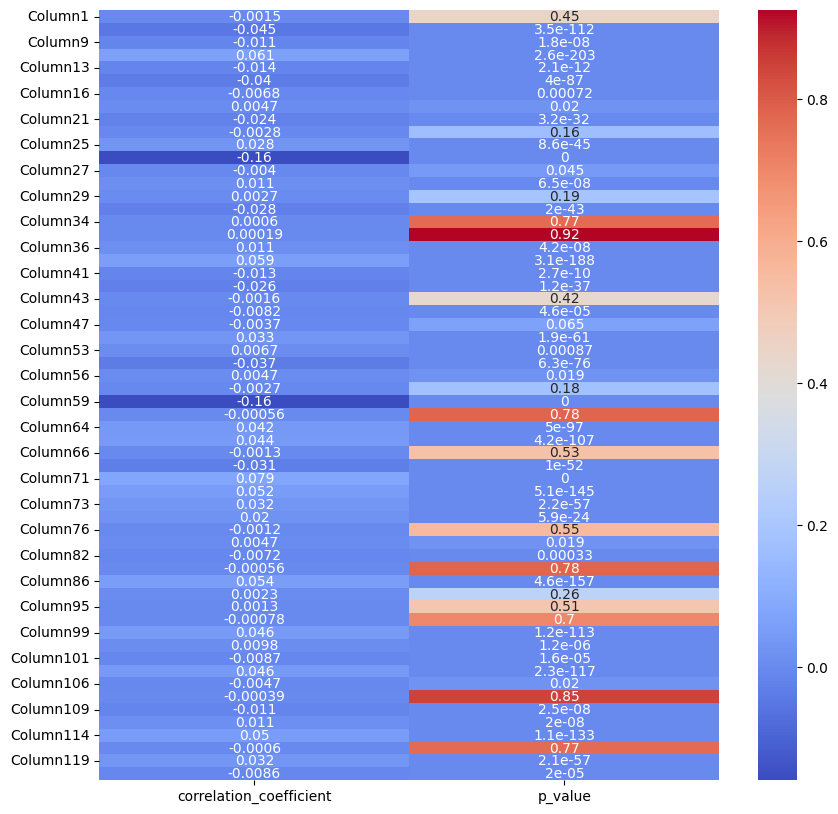

In [225]:
heatmapcw(10,10,correlation_df) # Appliying our heatmapcw funciton to correlation_df 

In [ ]:
def chitest(feature, label):
    """
    This funtion takes two dataframe,
    applies Chi-square test of independence to find realetionship between catagorical data and binary label column.
    Stores chi-statistic and p-value, returns a dataframe which has columns and their chi-statistic and p-value
    
    ---Parameters---
    feature: Dataframe for feature data
    label: Dataframe for label data

    ---Returns---
    chi_mat: Dataframe that has columns and their chi-statistic and p-value
    
    """
    chi_mat= pd.DataFrame(index=feature.columns, columns=["chi-stat", "p-val"])  #Creating Dataframe with "chi-stat", "p-val" columns and indexing the dataframe according to feature dataframe
    for column in feature.columns:  # Itterating over columns of feature dataframe 
        conting_table=pd.crosstab(label.values.flatten(), feature[column])  # Applying crosstab function to flattened label and feature columns, we flattened label in order to have 1-D array to make itterations, stored the operation in conting_table
        chi2_stat, p_val, _, _ = chi2_contingency(conting_table)  # Applying chi2_contingency function and storing chi2_stat, p_val from the operation
        chi_mat.loc[column,"chi-stat"] = chi2_stat  # Assining chi-stats to the related columns 
        chi_mat.loc[column,"p-val"] = p_val # Assining p-vals to rhe related columns 
    return chi_mat # Returning the Dataframe that has columns and their chi-statistic and p-value

In [227]:
chi2_matrix = chitest(objdf, Ldata) # Using our function with our dataframes
print(chi2_matrix)

              chi-stat     p-val
Column6     108.639627       0.0
Column7    1278.401181       0.0
Column17     28.292501  0.000083
Column31    953.272713       0.0
Column32    340.962035       0.0
Column45    981.977271       0.0
Column48       8.27538  0.004019
Column68    792.535618       0.0
Column70    733.021563       0.0
Column94     13.128499   0.04104
Column104   232.071989       0.0
Column118   438.593989       0.0


In [228]:
lst = chi2_matrix[chi2_matrix["chi-stat"] > 400].index.tolist()
lst

['Column7', 'Column31', 'Column45', 'Column68', 'Column70', 'Column118']

In [229]:
CorCat=pd.DataFrame() # Creating empty dataframe 
CorCat=objdf[lst]  # Filling empty dataframe with selected columns after the chi test, we stored them lst

In [230]:
CorCat.head() # Cheking CorCat

,Column7,Column31,Column45,Column68,Column70,Column118
0,Bus2,Come,Labs,Hign,F,Mard
1,Othr,Come,Dris,Secl,M,Mard
2,Bus3,Worg,Labs,Secl,M,Sind
3,Bus3,Come,Labs,Secl,M,Sind
4,Rest,Come,Accs,Incr,F,Sind


In [231]:
encCorCat=pd.get_dummies(CorCat) # Encoding our catagorical columns 

In [232]:
encCorCat.head() # Cheking encoded dataframe 

,Column7_Advg,Column7_Agre,Column7_Bank,Column7_Bus1,Column7_Bus2,Column7_Bus3,Column7_Cleg,Column7_Conn,Column7_Cule,Column7_Eley,...,Column68_Secl,Column70_F,Column70_M,Column70_XNA,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [233]:
corr_matrix = numdf.corr() 

In [234]:
numdf.shape

(246008, 60)

In [235]:
for col in corr_matrix.columns: 
    for index in corr_matrix.index: #here i look at each index of each column of corr_matrix
        corr_value = corr_matrix.loc[index,col] #and here by using .loc i can easily access the values of those index-column pairs
        if col != index: #i wrote this code because i dont want to delete the "1" of each index=column pairs and i dont want to delete a column-index pair if they have high correlation with label
            if corr_value < -0.50 or corr_value > 0.50:
                if col in numdf.columns and index in numdf.columns:
                    if numdf[col].std() > numdf[index].std():
                     numdf.drop(col, axis=1, inplace=True)
                    else:
                     numdf.drop(index, axis=1, inplace=True)
        else:
            continue


In [236]:
numdf.shape

(246008, 49)

In [237]:
param_grid = {
    'n_features_to_select': [5, 10, 15],
    "step" : [1]
}

In [238]:
rLdata=Ldata.values.ravel()
regressLog = LogisticRegression(max_iter = 1000,)
rfe = RFE(regressLog, n_features_to_select = 5, step = 1)
rfe.fit(numdf,rLdata)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [239]:
choices = []
others= []
for i, col in zip(range(numdf.shape[0]), numdf.columns):
    if rfe.support_[i]:
        choices.append((col))
    else:
        others.append((col, rfe.ranking_[i]))
print(choices)
print(others)

['Column42', 'Column64', 'Column71', 'Column86', 'Column114']
[('Column1', 3), ('Column9', 25), ('Column13', 12), ('Column16', 33), ('Column20', 41), ('Column21', 11), ('Column24', 40), ('Column25', 32), ('Column26', 5), ('Column27', 24), ('Column28', 23), ('Column29', 28), ('Column30', 18), ('Column34', 9), ('Column35', 37), ('Column41', 2), ('Column43', 10), ('Column46', 15), ('Column47', 36), ('Column51', 19), ('Column54', 27), ('Column56', 29), ('Column58', 4), ('Column59', 6), ('Column63', 20), ('Column65', 14), ('Column66', 38), ('Column73', 13), ('Column74', 8), ('Column76', 43), ('Column77', 39), ('Column82', 22), ('Column84', 34), ('Column91', 35), ('Column95', 44), ('Column98', 42), ('Column99', 17), ('Column101', 26), ('Column106', 31), ('Column107', 30), ('Column109', 21), ('Column113', 7), ('Column117', 45), ('Column121', 16)]


In [240]:
SelectNdf=numdf[[i for i in choices]]
SelectNdf.head()

,Column42,Column64,Column71,Column86,Column114
0,10.0,-6378.0,-12298.0,0.0,-4670.0
1,13.0,-1292.0,-15375.0,-509.0,-1994.0
2,5.0,-7951.0,-19307.0,-1474.0,-2842.0
3,10.0,-1033.0,-17791.0,-2016.0,-1345.0
4,5.0,-2873.0,-8486.0,-695.0,-852.0


In [242]:
opFdata=pd.concat([SelectNdf,encCorCat],axis=1)  # Merging our two dataframes that are results of finding realation between label column
opFdata.head() # Cheking new dataframe 

,Column42,Column64,Column71,Column86,Column114,Column7_Advg,Column7_Agre,Column7_Bank,Column7_Bus1,Column7_Bus2,...,Column68_Secl,Column70_F,Column70_M,Column70_XNA,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Unkn,Column118_Widw
0,10.0,-6378.0,-12298.0,0.0,-4670.0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,13.0,-1292.0,-15375.0,-509.0,-1994.0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,5.0,-7951.0,-19307.0,-1474.0,-2842.0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,10.0,-1033.0,-17791.0,-2016.0,-1345.0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,5.0,-2873.0,-8486.0,-695.0,-852.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [244]:
smote = SMOTE(sampling_strategy='auto', random_state=2)
X_smote, y_smote = smote.fit_resample(opFdata, Ldata)

                                                     Logistic Regression
                                                            

In [245]:
def logreg(Features, Label,testsize,testRandState):

    """
    This function takes two dataframes that contains Feature and Label data, applies logistic regresion with given parameters returns evaluation metrics
    
    --Parameters--

    Features: Feature dataframe 
    Label: Label dataframe
    testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
    testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
    --Returns--
    accuracy,precision,recall and f1 scores                                                                                                                                       
                                                                                                                
                                                                                            """
    X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=testsize, random_state=testRandState) # Spliting data with train_test_split function from sklearn 
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred= lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)*100
    cm = confusion_matrix(y_test, y_pred) 
    print("Confusion Matrix:")
    print(cm)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted') 
    return   print("Accuracy:", accuracy*100) , print("Precision:", precision*100),print("Recall:", recall*100),print("F1-score:", f1)

In [246]:
logreg(Features=opFdata, Label=Ldata,testsize=0.2,testRandState=4)

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[45197     0]
 [ 4005     0]]
Accuracy: 91.8600869883338
Precision: 84.38275581504254
Recall: 91.8600869883338
F1-score: 0.8796280366554143


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(None, None, None, None)

In [247]:
logreg(Features=X_smote, Label=y_smote, testsize=0.2, testRandState=4)

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[40976  4272]
 [ 8782 36430]]
Accuracy: 85.56931240327216
Precision: 85.9259655802246
Recall: 85.56931240327216
F1-score: 0.8553306490605407


(None, None, None, None)

                                                    Decision Tree

In [248]:
def OptimalPar(Features, Label, max_depthLow, max_depthUp, cvnum,min_samples_leafL, min_samples_leafU):
    """
    
    This function takes two dataframes that contains Feature and Label data, applies grid search with given parameters returns Best Hyperparameters and Best Accuracy with those parameters
    
    --Parameters--

    Features: Feature dataframe 
    Label: Label dataframe
    max_depthLow: This parameter decides the minimum threshold for  random iteration to use grid search to find optimum parameters over "max_depth" parameter from the sklearn library for DecisionTreeClassifier
    max_depthUp: This parameter decides the maximum threshold for  random iteration to use grid search to find optimum parameters over "max_depth" parameter from the sklearn library for DecisionTreeClassifier
    cvnum: "cv" parameter from sklearn library for GridSearchCV, this parameter decides the cross-validation splitting strategy.                                                        
    min_samples_leafL: This parameter decides the minimum threshold for  random iteration to use grid search to find optimum parameters over "min_samples_leaf" parameter from sklearn library for DecisionTreeClassifier, this parameter decides the minimum sample number required to be at a leaf node 
    min_samples_leafU: This parameter decides the maximum threshold for  random iteration to use grid search to find optimum parameters over "min_samples_leaf" parameter from sklearn library for DecisionTreeClassifier, this parameter decides the minimum sample number required to be at a leaf node


    --Returns--
      Best Hyperparameters and Best Accuracy with those parameters                                                      
                                                            """
                                                                    
                                                                                                
                                                                                                
                                                                                               
    Dtc = DecisionTreeClassifier()
    param_grid = {
        'max_depth': list(range(max_depthLow, max_depthUp)),
        'min_samples_leaf': list(range(min_samples_leafL, min_samples_leafU)),
    }
    grid_search = GridSearchCV(Dtc, param_grid, cv=cvnum)
    grid_search.fit(Features, Label)
    best_paramater=grid_search.best_params_
    return print("Best Hyperparameters: ", grid_search.best_params_), print("Best Accuracy: ", grid_search.best_score_)

In [249]:
best_paramater=OptimalPar(Features=opFdata, Label=Ldata, max_depthLow=1, max_depthUp=10, cvnum=5,min_samples_leafL=1,min_samples_leafU=5)

Best Hyperparameters:  {'max_depth': 1, 'min_samples_leaf': 1}
Best Accuracy:  0.9192709180109226


In [250]:
best_paramater= OptimalPar(Features=X_smote, Label = y_smote, max_depthLow=1, max_depthUp=10, cvnum=5, min_samples_leafL=1, min_samples_leafU=5)

Best Hyperparameters:  {'max_depth': 9, 'min_samples_leaf': 4}
Best Accuracy:  0.9047043546114389


In [251]:
def DecisionTree(Feature,label,testsize,testRandState,maxDepth,minSamplesLeaf):
    """
    
    This function takes two dataframes that contains Feature and Label data, applies grid search with given parameters returns Best Hyperparameters and Best Accuracy with those parameters
    
    --Parameters--

    Features: Feature dataframe 
    Label: Label dataframe
    testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
    testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
    maxDepth: "max_depth" parameter from the sklearn library for DecisionTreeClassifier       
    minSamplesLeaf: "min_samples_leaf" parameter from sklearn library for DecisionTreeClassifier, this parameter decides the minimum sample number required to be at a leaf node 


    --Returns--
    Best Hyperparameters and Best Accuracy with those parameters                                                      
                                                                                                                            """

    X_train, X_test, y_train, y_test = train_test_split( Feature, label, test_size = testsize, random_state = testRandState)
    Dtc=DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamplesLeaf)
    Dtc.fit(X_train, y_train)
    y_pred = Dtc.predict(X_test)      
    accuracy=accuracy_score(y_test,y_pred)*100
    cm = confusion_matrix(y_test, y_pred) 
    print("Confusion Matrix:")
    print(cm)

   
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted') 
    return   print("Accuracy:", accuracy*100) , print("Precision:", precision*100),print("Recall:", recall*100),print("F1-score:", f1)
   

In [252]:
DecisionTree(Feature=opFdata,label=Ldata,testsize=0.2,testRandState=4,maxDepth=1,minSamplesLeaf=1)

Confusion Matrix:
[[45197     0]
 [ 4005     0]]
Accuracy: 91.8600869883338
Precision: 84.38275581504254
Recall: 91.8600869883338
F1-score: 0.8796280366554143


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(None, None, None, None)

In [253]:
DecisionTree(Feature= X_smote, label =y_smote, testsize=0.2, testRandState=4, maxDepth=9, minSamplesLeaf=4)

Confusion Matrix:
[[44072  1176]
 [ 7685 37527]]
Accuracy: 90.20451028078709
Precision: 91.05427145164029
Recall: 90.20451028078709
F1-score: 0.901532458243732


(None, None, None, None)

                                                                Random Forest

In [254]:
def OptimalParam(Feature,label,testsize,testRandState,n_estimatorRandLow,n_estimatorRandHigh,max_depthRandLow,max_deptRandhHigh,n_iterValue,crossValNum): 
    """
    
This function takes two dataframes that contains Feature and Label data, applies randomized search with given parameters returns best_param: Variable that contains best parameters that acquired by RandomizedSearchCV

    
--Parameters--

Features: Feature dataframe 
Label: Label dataframe
testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
n_estimatorRandLow:This parameter decides the minimum threshold for  random iteration to use randomized search to find optimum parameters  over "n_estimators" parameter from the sklearn library for RandomForestClassifier    
n_estimatorRandHigh: This parameter decides the maximum threshold for  random iteration to use randomized search to find optimum parameters  over "n_estimators" parameter from the sklearn library for RandomForestClassifier
max_depthRandLow: This parameter decides the minimum threshold for  random iteration to use randomized search to find optimum parameters over "max_depth" parameter from the sklearn library for RandomForestClassifier
max_deptRandhHigh: This parameter decides the maximum threshold for  random iteration to use randomized search to find optimum parameters over "max_depth" parameter from the sklearn library for RandomForestClassifier
n_iterValue: "n_iter" parameter from sklearn library for RandomizedSearchCV, this parameter decides the iteration number to trade off with the run-time of the function and quality of the solution         
crossValNum: "cv" parameter from sklearn library for RandomizedSearchCV, this parameter decides the cross-validation splitting strategy.                                                        


--Returns--
best_param: Variable that contains best parameters that acquired by RandomizedSearchCV
                                                   
                                                            """                                                                                                                        
    labelrev=label.values.ravel()
    X_train, X_test, y_train, y_test = train_test_split( Feature, labelrev, test_size = testsize, random_state = testRandState)
    param_dist={'n_estimators': randint(n_estimatorRandLow,n_estimatorRandHigh),
              'max_depth': randint(max_depthRandLow,max_deptRandhHigh)}
    randF=RandomForestClassifier()
    rand_search=RandomizedSearchCV(randF, 
                                 param_distributions = param_dist, 
                                 n_iter=n_iterValue, 
                                 cv=crossValNum)
    rand_search.fit(X_train, y_train)
    best_param = rand_search.best_estimator_
    return best_param

In [255]:
best_param= OptimalParam(Feature=opFdata,label=Ldata,testsize=0.2,testRandState=100,n_estimatorRandLow=50,n_estimatorRandHigh=500,max_depthRandLow=1,max_deptRandhHigh=20,n_iterValue=5,crossValNum=5)

In [257]:
def RandomForest(Feature,label,testsize,testRandState,maxDepthNum,n_estimNum):
     """
    
    This function takes two dataframes that contains Feature and Label data, applies RandomForest with given parameters returns evaluation metrics
    
    --Parameters--

    Features: Feature dataframe 
    Label: Label dataframe
    testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
    testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
    maxDepthNum: "max_depth" parameter from the sklearn library for DecisionTreeClassifier       
    n_estimNum: "n_estimators" parameter from the sklearn library for RandomForestClassifier  


    --Returns--
    Accuracy,precision,recall and f1 scores 
                                                         
                                                                                                                            """


     X_train, X_test, y_train, y_test = train_test_split( Feature, label, test_size = testsize, random_state = testRandState)
     rf = RandomForestClassifier(n_estimators=n_estimNum, max_depth=maxDepthNum)
     rf.fit(X_train, y_train)
     yPred=rf.predict(X_test)
     accuracy = accuracy_score(y_test, yPred)
     accuracy = accuracy_score(y_test, yPred) 
     precision = precision_score(y_test, yPred, average='weighted') 
     recall = recall_score(y_test, yPred, average='weighted') 
     f1 = f1_score(y_test, yPred, average='weighted') 
     return   print("Accuracy:", accuracy) , print("Precision:", precision),print("Recall:", recall),print("F1-score:", f1)
    


In [258]:
RandomForest(Feature=opFdata,label=Ldata,testsize=0.2,testRandState=100,maxDepthNum=best_param.max_depth,n_estimNum=best_param.n_estimators)

C:\Users\Aleyna\AppData\Local\Temp\ipykernel_4876\2388154325.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.9181740579651234
Precision: 0.8430436007201418
Recall: 0.9181740579651234
F1-score: 0.8790063625555197


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(None, None, None, None)

                                        Random forest smote
                                    

In [259]:
def OptimalParam(Feature,label,testsize,testRandState,n_estimatorRandLow,n_estimatorRandHigh,max_depthRandLow,max_deptRandhHigh,n_iterValue,crossValNum): 

    """   This function takes two dataframes that contains Feature and Label data, applies randomized search with given parameters returns best_param: Variable that contains best parameters that acquired by RandomizedSearchCV

    
--Parameters--

Features: Feature dataframe 
Label: Label dataframe
testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
n_estimatorRandLow:This parameter decides the minimum threshold for  random iteration to use randomized search to find optimum parameters  over "n_estimators" parameter from the sklearn library for RandomForestClassifier    
n_estimatorRandHigh: This parameter decides the maximum threshold for  random iteration to use randomized search to find optimum parameters  over "n_estimators" parameter from the sklearn library for RandomForestClassifier
max_depthRandLow: This parameter decides the minimum threshold for  random iteration to use randomized search to find optimum parameters over "max_depth" parameter from the sklearn library for RandomForestClassifier
max_deptRandhHigh: This parameter decides the maximum threshold for  random iteration to use randomized search to find optimum parameters over "max_depth" parameter from the sklearn library for RandomForestClassifier
n_iterValue: "n_iter" parameter from sklearn library for RandomizedSearchCV, this parameter decides the iteration number to trade off with the run-time of the function and quality of the solution         
crossValNum: "cv" parameter from sklearn library for RandomizedSearchCV, this parameter decides the cross-validation splitting strategy.                                                        


--Returns--
best_param: Variable that contains best parameters that acquired by RandomizedSearchCV
                                                   
                                                            """                                                                                                                             
    labelrev=label.values.ravel()
    X_train, X_test, y_train, y_test = train_test_split( Feature, labelrev, test_size = testsize, random_state = testRandState)
    param_dist={'n_estimators': randint(n_estimatorRandLow,n_estimatorRandHigh),
              'max_depth': randint(max_depthRandLow,max_deptRandhHigh)}
    randF=RandomForestClassifier()
    rand_search=RandomizedSearchCV(randF, 
                                 param_distributions = param_dist, 
                                 n_iter=n_iterValue, 
                                 cv=crossValNum)
    rand_search.fit(X_train, y_train)
    best_param = rand_search.best_estimator_
    return best_param

In [260]:
best_param=OptimalParam(Feature=X_smote, label=y_smote, testsize=0.2, testRandState=100, n_estimatorRandLow=50,n_estimatorRandHigh=500,max_depthRandLow=1, max_deptRandhHigh=20,n_iterValue=5, crossValNum=5)

In [261]:
def RandomForest(Feature,label,testsize,testRandState,maxDepthNum,n_estimNum):
     """
    
    This function takes two dataframes that contains Feature and Label data, applies RandomForest with given parameters returns evaluation metrics
    
    --Parameters--

    Features: Feature dataframe 
    Label: Label dataframe
    testsize:  "test_size" parameter from sklearn library for train_test_split function, this parameter decides the split between test and training data
    testRandState: "random_state" parameter from sklearn library for train_test_split function, this parameter allows the function to control randomizing, by setting a seed
    maxDepthNum: "max_depth" parameter from the sklearn library for DecisionTreeClassifier       
    n_estimNum: "n_estimators" parameter from the sklearn library for RandomForestClassifier  


    --Returns--
    Accuracy,precision,recall and f1 scores 
                                                         
                                                                                                                            """
     X_train, X_test, y_train, y_test = train_test_split( Feature, label, test_size = testsize, random_state = testRandState)
     rf = RandomForestClassifier(n_estimators=n_estimNum, max_depth=maxDepthNum)
     rf.fit(X_train, y_train)
     yPred=rf.predict(X_test)
     accuracy = accuracy_score(y_test, yPred)
     accuracy = accuracy_score(y_test, yPred) 
     precision = precision_score(y_test, yPred, average='weighted') 
     recall = recall_score(y_test, yPred, average='weighted') 
     f1 = f1_score(y_test, yPred, average='weighted') 
     return   print("Accuracy:", accuracy) , print("Precision:", precision),print("Recall:", recall),print("F1-score:", f1)
    


In [265]:
RandomForest(Feature=X_smote, label=y_smote,testsize = 0.2, testRandState=100,maxDepthNum=best_param.max_depth,n_estimNum=best_param.n_estimators )

C:\Users\Aleyna\AppData\Local\Temp\ipykernel_4876\2388154325.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.9354189697103692
Precision: 0.9420533082263733
Recall: 0.9354189697103692
F1-score: 0.9351837864656276


(None, None, None, None)